<a href="https://www.kaggle.com/code/ismaelelhussein/ecg-machine-and-deep-learning-models?scriptVersionId=174790211" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:                        
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
Note: you may need to restart the kernel to use updated packages.


***Importing our main libraries***

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from sklearn.utils import class_weight

2024-04-29 23:19:30.193095: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-29 23:19:30.193217: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-29 23:19:30.450990: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
import tensorflow as tf

# Check if GPU is available
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


***Firstly,
MIT- Arrhythmia Dataset contains:
Number of Samples: 109446
Number of Categories: 5
Sampling Frequency: 125Hz
Data Source: Physionet's MIT-BIH Arrhythmia Dataset
Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
We read through pandas library .csv file to start processing on it,***

- ECG heartbeat classification can be used in real-time for arrhythmia detection. Arrhythmias are abnormal heart rhythms that can be dangerous. By classifying heartbeats in real-time, doctors can monitor patients for arrhythmias and intervene quickly if necessary.
- For instance, a device worn by a patient could use ECG heartbeat classification to monitor their heart rhythm for signs of arrhythmia. If an arrhythmia is detected, the device could alert the patient or their doctor, and also for driver detection of fatigue using ecg sensor or smartwatch.

In [6]:
train_df = pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv',header=None)
test_df = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv',header=None)

***let's show the data to know what it contains how many rows & columns***

In [7]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


***We get the unique values from the last column that contains all classes and our target, and rename it to become more clear and clarifiable***

In [8]:
# Assuming the target column is the last column
target_column_index = train_df.shape[1] - 1

# Get the unique values in the target column
class_labels = train_df[target_column_index].unique()

# Assign meaningful names to the class labels based on domain knowledge
class_names = {
    0: "Normal Beats",
    1: "Supraventricular Ectopy Beats",
    2: "Ventricular Ectopy Beats",
    3: "Fusion Beats",
    4: "Unclassifiable Beats"
}

# Print class labels with their assigned names
for label in class_labels:
    print(f"Class label {label}: {class_names[label]}")

Class label 0.0: Normal Beats
Class label 1.0: Supraventricular Ectopy Beats
Class label 2.0: Ventricular Ectopy Beats
Class label 3.0: Fusion Beats
Class label 4.0: Unclassifiable Beats


***See if there's missing values in the dataset, by seeing the NaN and average mean but all of the columns have a numbers because its contains of reads in every row at the end of column numbers it captures the electrical activity of your heart over time, ECG datasets are typically large and formatted with multiple leads (channels) capturing electrical activity from different angles of the heart.***

In [9]:
# Explore dataset
print("Columns and their NaN percentages:")
null_col = train_df.isna().mean() * 100
print(null_col)

Columns and their NaN percentages:
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
183    0.0
184    0.0
185    0.0
186    0.0
187    0.0
Length: 188, dtype: float64


***Change the datatype to float and get the unique values in the last column to see how many rows in every class and store them in equilibre variable and print them***

In [10]:
train_df[187]=train_df[187].astype(float)
equilibre = train_df[187].value_counts()
print(equilibre)

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


***Printing all column names, but on our case there's no column names so, it prints index of them***

In [11]:
print(train_df.columns)

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
      dtype='int64', length=188)


***Getting all info about the training dataset***

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


***Getting all mean on every column***

In [13]:
# Assuming you loaded the data into a DataFrame named 'data'
column_means = train_df.mean()
print(column_means)

0      0.890360
1      0.758160
2      0.423972
3      0.219104
4      0.201127
         ...   
183    0.003471
184    0.003221
185    0.002945
186    0.002807
187    0.473376
Length: 188, dtype: float64


***(describe) shows the mean and counting numbers of rows and many info that could led us to understand more about it***

In [14]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


# **Pre-Processing Phase**

***With Last column (188) index -1, is the features that contains all classes, we split it into features and labels***

In [15]:
X = train_df.drop(columns = [187])
y = train_df[187]

***Spliting the data into train, test, valid for using them in machine and deep learning models. Use standard scaler function to normalize our data that not nesscasary because all of the data is reading we want to analyze, but might help in the models below when training on it***

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_normalized = scaler.fit_transform(X_train)
# Transform the valid data using the fitted scaler
X_valid_normalized = scaler.transform(X_valid)
# Transform the test data using the fitted scaler
X_test_normalized = scaler.transform(X_test)



***Shows the first 5 rows in data***

In [17]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
means = train_df.mean()
print(means)

0      0.890360
1      0.758160
2      0.423972
3      0.219104
4      0.201127
         ...   
183    0.003471
184    0.003221
185    0.002945
186    0.002807
187    0.473376
Length: 188, dtype: float64


***Get a pie chart that explain every class with its perecentages in the training dataset***

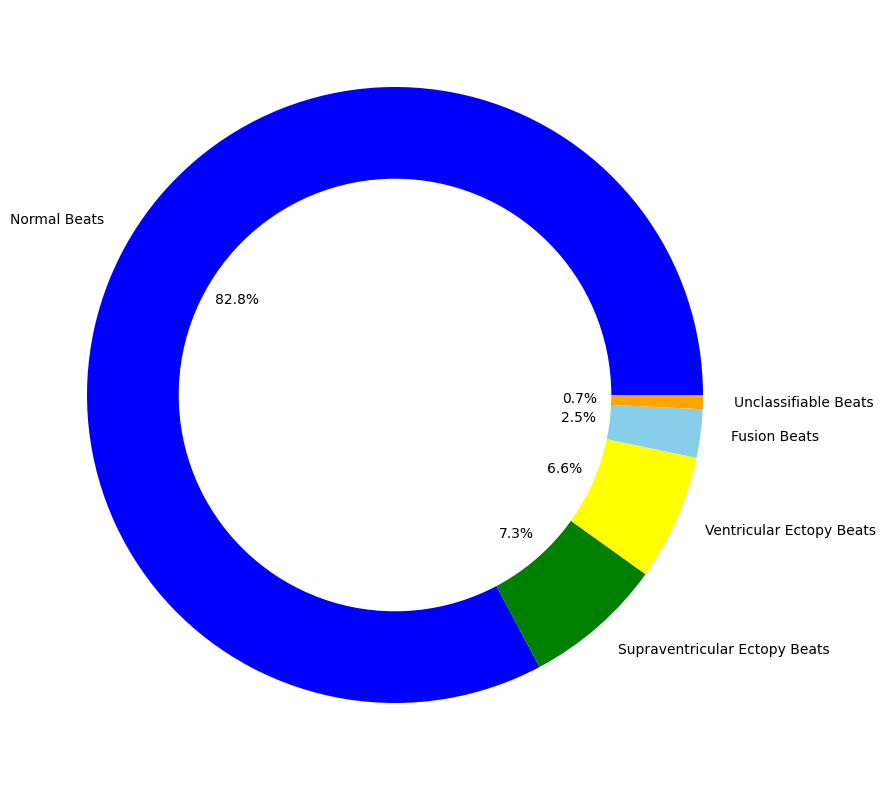

In [19]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['Normal Beats','Supraventricular Ectopy Beats','Ventricular Ectopy Beats','Fusion Beats','Unclassifiable Beats'], colors=['Blue','Green','Yellow','Skyblue','Orange'],autopct='%1.1f%%', textprops={'color': 'black'})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [20]:

df_1 = train_df[train_df[187] == 1]
df_2 = train_df[train_df[187] == 2]
df_3 = train_df[train_df[187] == 3]
df_4 = train_df[train_df[187] == 4]


***Resample the data to 7000 samples each to make it more balance to work in it, because the normal beats class contains many samples than the others and that could led for imbalance that in the model for an overfitting***

In [21]:
from sklearn.utils import resample

df_1_upsample = resample(df_1, n_samples = 7000, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 7000, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 7000, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 7000, replace = True, random_state = 123)
df_0 = train_df[train_df[187]==0].sample(n =7000, random_state=123)
train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])



***Enusre of our resample works***

In [22]:
print(train_df[187].value_counts())
print(len(train_df[187].value_counts()))


187
0.0    7000
1.0    7000
2.0    7000
3.0    7000
4.0    7000
Name: count, dtype: int64
5


***A pie chart shows after resampling the classes with its perecentages***

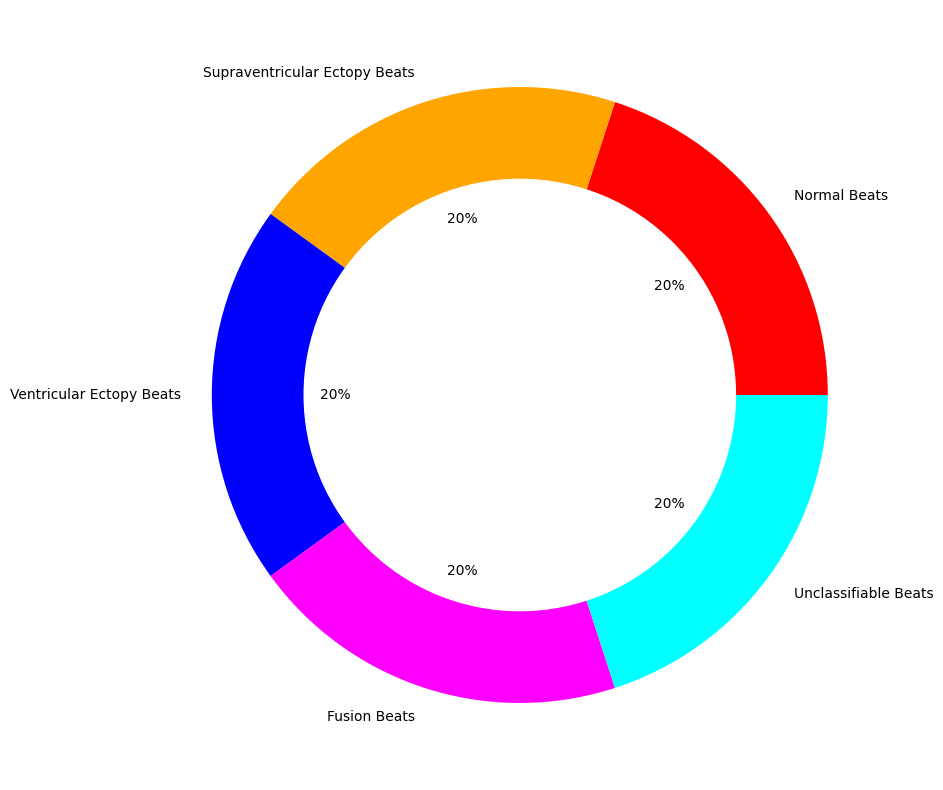

In [23]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train_df[187].value_counts(), labels=['Normal Beats','Supraventricular Ectopy Beats','Ventricular Ectopy Beats','Fusion Beats','Unclassifiable Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

***Shows all the info of the test***

In [24]:
print (test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB
None


***Printing the shape of the training dataset after resampling it***

In [25]:
train_df.shape

(35000, 188)

# **Machine Learning Classifiers**

# ***Support Vector Machine (SVM) Classifier***

***It is a supervised machine learning algorithm which can be used for both classification and regression problems. However, it is mostly used in classification applications.
• The classification is performed by finding the hyperplane that best separates the two classes.***
- Select the hyper-plane which separate the two classes better.
- Maximizing the distance between nearest data point (either class) and the hyper-plane. This distance is called Margin.
- Margin: it is the distance between the hyperplane and the observations closest to the hyperplane (support vectors).
- Support Vectors: These are the points that are closest to the hyperplane. A separating line will be defined with the help of these data points.

In [26]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create the SVM classifier
svm_classifier = svm.SVC(kernel='rbf', random_state=42)

# Train the classifier on the normalized training data
svm_classifier.fit(X_train_normalized, y_train)

# Make predictions on the normalized validation set
y_pred_valid = svm_classifier.predict(X_valid_normalized)

# Calculate accuracy on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)

# Make predictions on the normalized test set
y_pred_test = svm_classifier.predict(X_test_normalized)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.9673781140695268
Test Accuracy: 0.9666495345782651


# ***Decision Tree (DT) Classifier***

- Decision trees being one of the most popular and effective techniques used to solve classification problems.
- It is important to prioritize the features when creating a tree.

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create the Decision Tree classifier
clf_dt = DecisionTreeClassifier(random_state=42)

# Train the classifier on the normalized training data
clf_dt.fit(X_train_normalized, y_train)

# Make predictions on the normalized validation set
y_pred_valid = clf_dt.predict(X_valid_normalized)

# Calculate accuracy on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)

# Make predictions on the normalized test set
y_pred_test = clf_dt.predict(X_test_normalized)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.9498179741594689
Test Accuracy: 0.9511735480555079


# ***Ensemble Classifier (Voting Classifier to merge two models)***

***A voting classifier is a machine learning model that combines the predictions of several other individual models, also known as an ensemble method.  Instead of relying on a single model, it leverages the strengths of various models to arrive at a more robust prediction.***

In [28]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Create the voting ensemble
voting_clf = VotingClassifier(estimators=[('decision_tree', clf_dt), ('support_vector_machine', svm_classifier)], voting='hard')

# Train the voting ensemble on the normalized training data
voting_clf.fit(X_train_normalized, y_train)

# Make predictions on the normalized validation set
y_pred_valid = voting_clf.predict(X_valid_normalized)

# Calculate accuracy on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)

# Make predictions on the normalized test set
y_pred_test = voting_clf.predict(X_test_normalized)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.9621671782425584
Test Accuracy: 0.9607675175603906


# **Deep Learning Models**

# ***Building Feedforward Neural Network (FNN) Model***

***Feedforward Neural Network, is a fundamental type of artificial neural network architecture characterized by the unidirectional flow of information, which is a basic model that contains an input, optional hidden, and output layers.***

***We build the model and see its Architicture with an input and only one hidden layer and finally the output layer***

In [72]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

# Create the FNN model
FNN_model = Sequential()

# Add the first hidden layer with input shape 187
FNN_model.add(Dense(512, activation='relu', input_shape=(187,)))
FNN_model.add(Dropout(0.3)) # Add dropout layer with dropout rate 0.5

# Add the second hidden layer
FNN_model.add(Dense(512, activation='relu'))
FNN_model.add(Dropout(0.1)) # Add dropout layer with dropout rate 0.1


# Add the output layer
FNN_model.add(Dense(5, activation='softmax'))

# Compile the model
FNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Print the model summary
FNN_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 512)               96256     
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 512)               262656    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 361477 (1.38 MB)
Trainable params: 361477 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


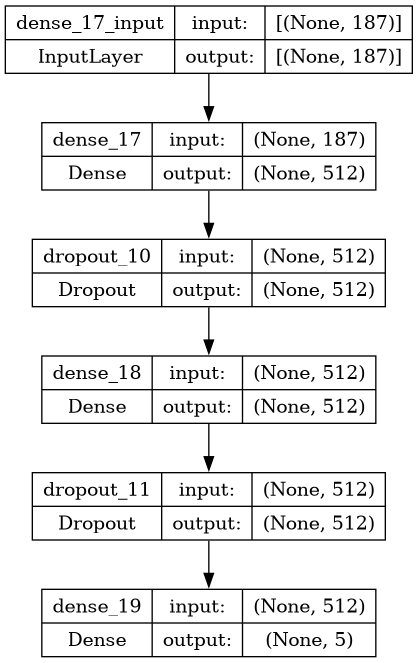

In [73]:
from tensorflow.keras.utils import plot_model

# Plot model with colored border
plot_model(FNN_model, to_file='FNN_model_plot.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)

***By parameterizing and reach the best possible layers in the model we run the epochs which the number of iterations on our data to see its accuracy, loss.***

In [74]:
# Fit the model
history_FNN = FNN_model.fit(X_train_normalized, y_train,
                    epochs=50,  # number of epochs
                    batch_size=128,  # batch size
                    validation_data=(X_valid_normalized, y_valid),
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model
loss, accuracy = FNN_model.evaluate(X_valid_normalized, y_valid)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

Epoch 1/50
438/438 [==============================] - 3s 4ms/step - loss: 0.2200 - accuracy: 0.9391 - val_loss: 0.1567 - val_accuracy: 0.9535
Epoch 2/50
438/438 [==============================] - 2s 3ms/step - loss: 0.1384 - accuracy: 0.9611 - val_loss: 0.1376 - val_accuracy: 0.9647
Epoch 3/50
438/438 [==============================] - 1s 3ms/step - loss: 0.1182 - accuracy: 0.9665 - val_loss: 0.1147 - val_accuracy: 0.9689
Epoch 4/50
438/438 [==============================] - 1s 3ms/step - loss: 0.1044 - accuracy: 0.9703 - val_loss: 0.1058 - val_accuracy: 0.9717
Epoch 5/50
438/438 [==============================] - 2s 4ms/step - loss: 0.0976 - accuracy: 0.9726 - val_loss: 0.0970 - val_accuracy: 0.9735
Epoch 6/50
438/438 [==============================] - 1s 3ms/step - loss: 0.0896 - accuracy: 0.9743 - val_loss: 0.0927 - val_accuracy: 0.9734
Epoch 7/50
438/438 [==============================] - 1s 3ms/step - loss: 0.0832 - accuracy: 0.9756 - val_loss: 0.0903 - val_accuracy: 0.9762
Epoch 

***Visualize our Training, Valid accuracies and loss***

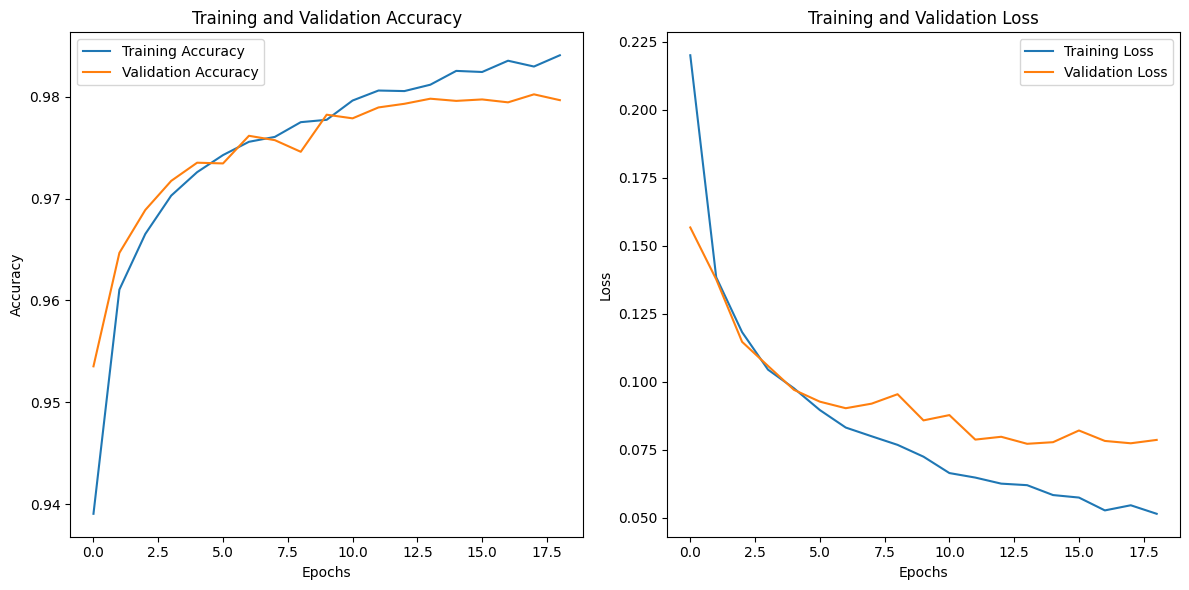

In [75]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_FNN.history['accuracy'], label='Training Accuracy')
plt.plot(history_FNN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_FNN.history['loss'], label='Training Loss')
plt.plot(history_FNN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

***Reshapes the true labels (y_test) into a 2D array suitable for the OneHotEncoder, converts the encoded labels back to single integer labels by taking the index of the maximum value along axis 1, and evaluating model's performance by visualizing how well it classified the test data using a confusion matrix. The heatmap with annotations allows you to see how many data points from each true class were correctly predicted as each class by the model.***

548/548 [==============================] - 1s 1ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


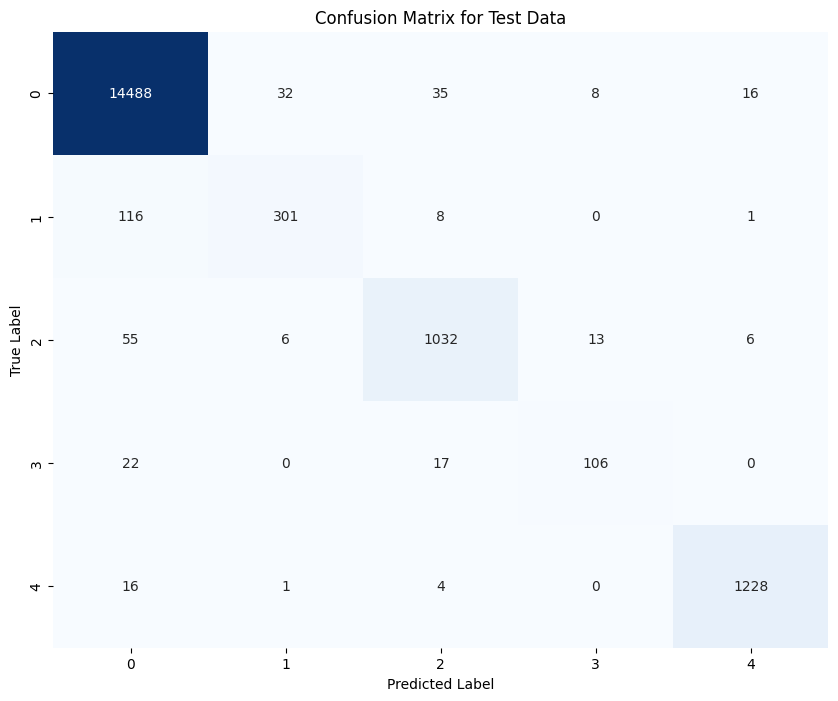

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Make predictions on the test data
y_pred_test_prob = FNN_model.predict(X_test_normalized)
y_pred_test_classes = np.argmax(y_pred_test_prob, axis=1)  # Convert probabilities to class labels

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Reshape y_test to a 2D array (required by OneHotEncoder)
y_test_reshaped = y_test.to_numpy().reshape(-1, 1)

# Fit and transform y_test to one-hot encoded format
y_test_onehot = encoder.fit_transform(y_test_reshaped)

# Convert one-hot encoded labels to single integer labels for y_test
y_test_classes = np.argmax(y_test_onehot, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_test_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


***Visualizing it but with perecentages***

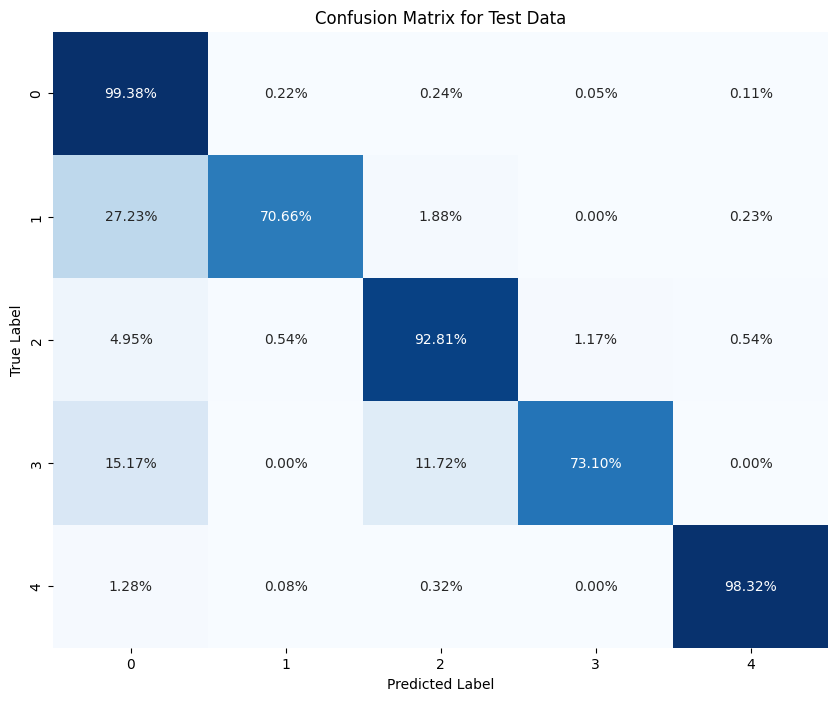

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix as before
conf_matrix = confusion_matrix(y_test_classes, y_pred_test_classes)

# Compute percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [78]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_test_classes)

# Print confusion matrix
print("Confusion Matrix for Test Data:")
print(conf_matrix)


Confusion Matrix for Test Data:
[[14488    32    35     8    16]
 [  116   301     8     0     1]
 [   55     6  1032    13     6]
 [   22     0    17   106     0]
 [   16     1     4     0  1228]]


***Getting the test accuracy with higher test accuracy because of the normal beats class that has the most more samples than the others***

In [79]:
from sklearn.metrics import accuracy_score

# Compute accuracy
test_accuracy = accuracy_score(y_test_classes, y_pred_test_classes)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.98


***Getting the precision, accuracy, recall, f1-score***

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test_classes, y_pred_test_classes):
    accuracy = accuracy_score(y_test_classes, y_pred_test_classes)
    precision = precision_score(y_test_classes, y_pred_test_classes, average='micro')
    recall = recall_score(y_test_classes, y_pred_test_classes, average='micro')
    f1 = f1_score(y_test_classes, y_pred_test_classes, average='micro')
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

# Example usage:
evaluate_model(y_test_classes, y_pred_test_classes)


Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-score: 0.98


# ***Building Convolutional Neural Network (CNN) Model with the best Confusion Matrix***

***The architecture of CNN for image recognition typically consists of several layers, including convolutional layers, pooling layers, and fully connected layers.***

In [81]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from keras.callbacks import EarlyStopping

# Create the CNN model
CNN_model = Sequential()

# Add the first convolutional layer
CNN_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(187,1)))
CNN_model.add(Dense(256, activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Dropout(0.5)) # Add dropout

# Add the second convolutional layer
CNN_model.add(Conv1D(64, kernel_size=3, activation='relu'))
CNN_model.add(Dense(256, activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Dropout(0.1)) # Add dropout

# Add the Flatten layer
CNN_model.add(Flatten())

# Add the output layer
CNN_model.add(Dense(5, activation='softmax'))

# Compile the model
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Print the model summary
CNN_model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 185, 32)           128       
                                                                 
 dense_20 (Dense)            (None, 185, 256)          8448      
                                                                 
 batch_normalization_2 (Bat  (None, 185, 256)          1024      
 chNormalization)                                                
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 92, 256)           0         
 g1D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 92, 256)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 90, 64)          

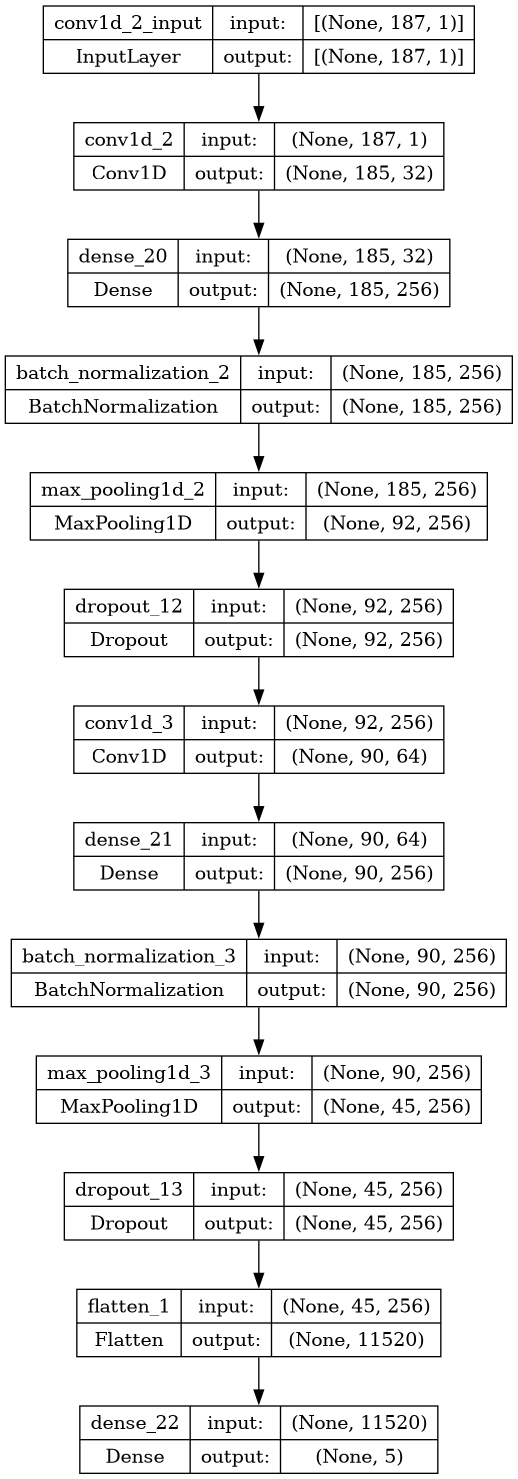

In [82]:
from tensorflow.keras.utils import plot_model

# Plot model with colored border
plot_model(CNN_model, to_file='CNN_model_plot.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)

***Same as FNN shows the accuracies per epoch put with CNN model***

In [83]:
# Fit the CNN model
history_CNN = CNN_model.fit(X_train_normalized, y_train,
                    epochs=50,  # number of epochs
                    batch_size=64,  # batch size
                    validation_data=(X_valid_normalized, y_valid),
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model
loss, accuracy = CNN_model.evaluate(X_valid_normalized, y_valid)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

Epoch 1/50
876/876 [==============================] - 11s 10ms/step - loss: 0.3682 - accuracy: 0.9293 - val_loss: 0.2752 - val_accuracy: 0.9556
Epoch 2/50
876/876 [==============================] - 9s 10ms/step - loss: 0.2359 - accuracy: 0.9542 - val_loss: 0.2162 - val_accuracy: 0.9399
Epoch 3/50
876/876 [==============================] - 9s 10ms/step - loss: 0.1724 - accuracy: 0.9638 - val_loss: 0.1472 - val_accuracy: 0.9677
Epoch 4/50
876/876 [==============================] - 9s 10ms/step - loss: 0.1334 - accuracy: 0.9688 - val_loss: 0.1240 - val_accuracy: 0.9700
Epoch 5/50
876/876 [==============================] - 9s 10ms/step - loss: 0.1106 - accuracy: 0.9722 - val_loss: 0.1228 - val_accuracy: 0.9697
Epoch 6/50
876/876 [==============================] - 9s 10ms/step - loss: 0.0928 - accuracy: 0.9758 - val_loss: 0.1119 - val_accuracy: 0.9754
Epoch 7/50
876/876 [==============================] - 9s 10ms/step - loss: 0.0820 - accuracy: 0.9773 - val_loss: 0.1191 - val_accuracy: 0.972

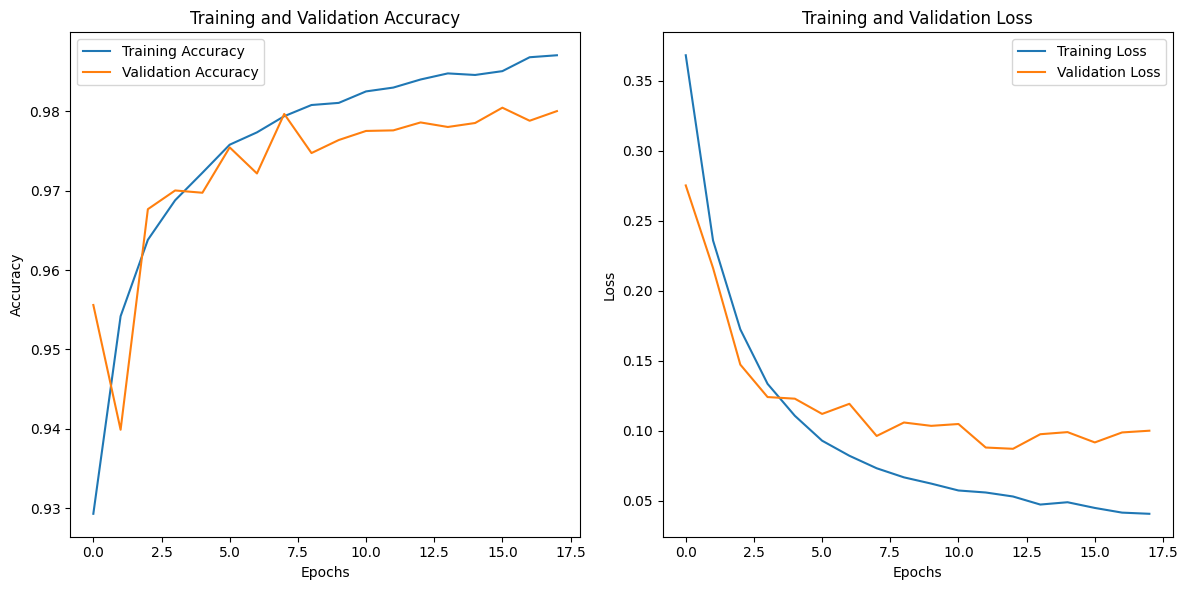

In [84]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_CNN.history['accuracy'], label='Training Accuracy')
plt.plot(history_CNN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_CNN.history['loss'], label='Training Loss')
plt.plot(history_CNN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

548/548 [==============================] - 2s 3ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


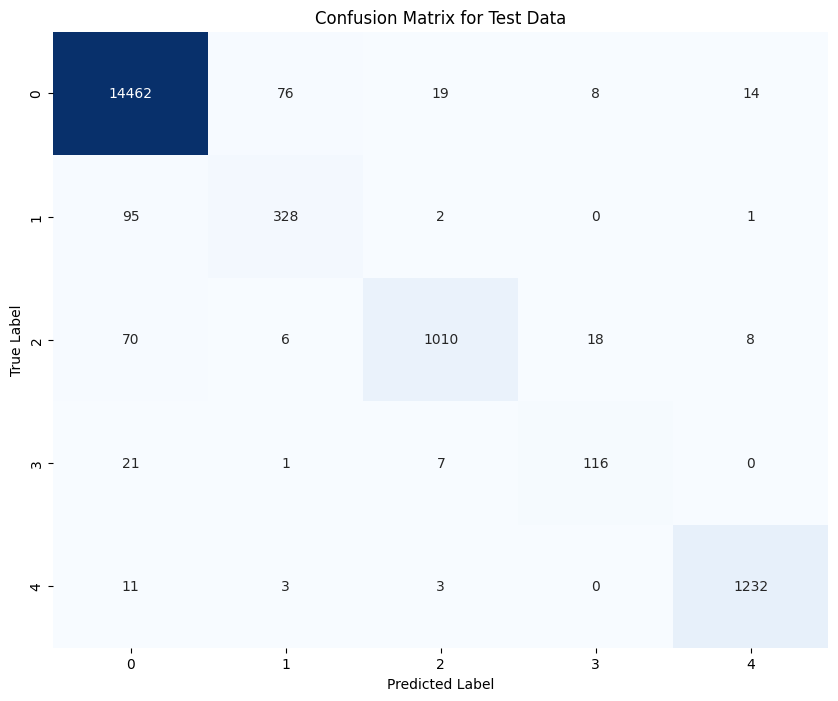

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Make predictions on the test data
y_pred_test_prob_CNN = CNN_model.predict(X_test_normalized)
y_pred_test_classes_CNN = np.argmax(y_pred_test_prob_CNN, axis=1)  # Convert probabilities to class labels

# Initialize OneHotEncoder
encoder_CNN = OneHotEncoder(sparse=False)

# Reshape y_test to a 2D array (required by OneHotEncoder)
y_test_reshaped_CNN = y_test.to_numpy().reshape(-1, 1)

# Fit and transform y_test to one-hot encoded format
y_test_onehot_CNN = encoder_CNN.fit_transform(y_test_reshaped_CNN)

# Convert one-hot encoded labels to single integer labels for y_test
y_test_classes_CNN = np.argmax(y_test_onehot_CNN, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes_CNN, y_pred_test_classes_CNN)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


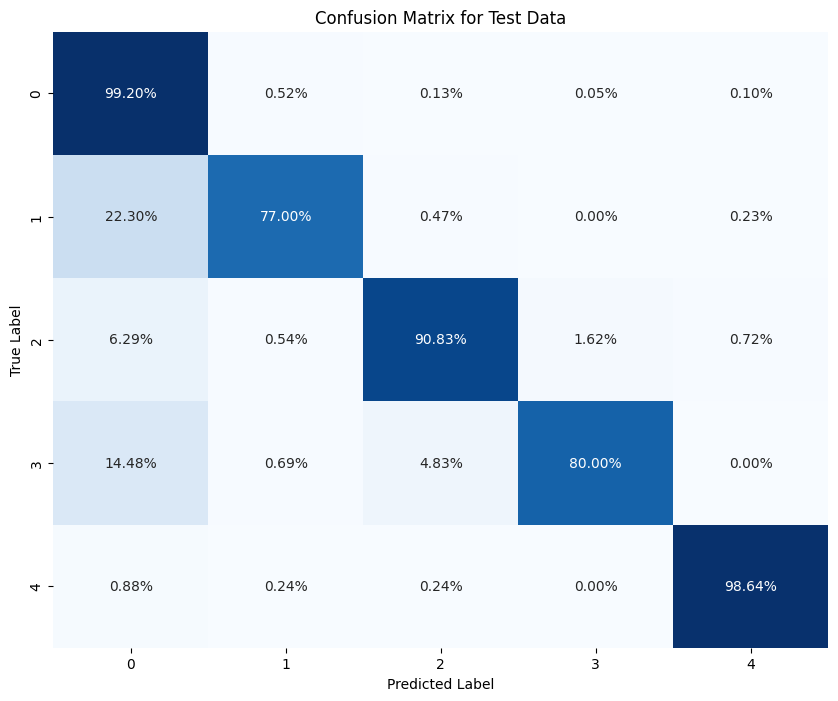

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix as before
conf_matrix = confusion_matrix(y_test_classes_CNN, y_pred_test_classes_CNN)

# Compute percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [87]:
from sklearn.metrics import accuracy_score

# Compute accuracy
test_accuracy = accuracy_score(y_test_classes_CNN, y_pred_test_classes_CNN)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.98


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test_classes_CNN, y_pred_test_classes_CNN):
    accuracy = accuracy_score(y_test_classes_CNN, y_pred_test_classes_CNN)
    precision = precision_score(y_test_classes_CNN, y_pred_test_classes_CNN, average='micro')
    recall = recall_score(y_test_classes_CNN, y_pred_test_classes_CNN, average='micro')
    f1 = f1_score(y_test_classes_CNN, y_pred_test_classes_CNN, average='micro')
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

# Example usage:
evaluate_model(y_test_classes_CNN, y_pred_test_classes_CNN)


Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-score: 0.98


# ***Building a Recurrent Neural Network (LSTM) Model with the best accuracy***

***An RNN can handle sequential data, accepting the current input data, and previously received inputs. RNNs can memorize previous inputs due to their internal memory. RNN works on the principle of saving the output of a particular layer and feeding this back to the input in order to predict the output of the layer.***

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

def create_rnn_model(input_shape, output_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape[1:], return_sequences=True),
        LSTM(64),
        Dense(128, activation='relu'),
        Dense(output_shape, activation='softmax')
    ])
    return model



input_shape = (87554,187, 1) 
output_shape = 5  # Assuming 5 classes for classification

# Create the RNN model
rnn_model = create_rnn_model(input_shape, output_shape)

# Compile the model
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
rnn_model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 187, 64)           16896     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_23 (Dense)            (None, 128)               8320      
                                                                 
 dense_24 (Dense)            (None, 5)                 645       
                                                                 
Total params: 58885 (230.02 KB)
Trainable params: 58885 (230.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


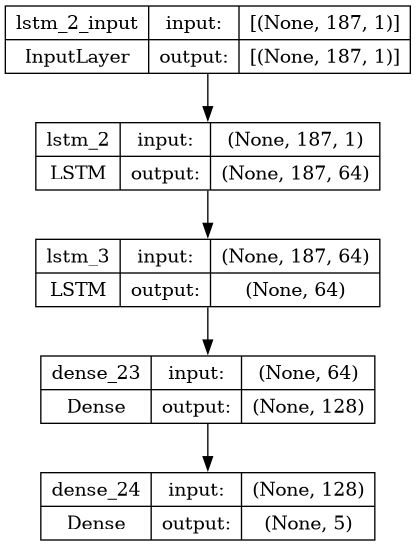

In [90]:
from tensorflow.keras.utils import plot_model

# Plot model with colored border
plot_model(rnn_model, to_file='rnn_model_plot.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)

In [91]:
# Print the number of samples
num_samples = X.shape[0]
print("Number of samples:", num_samples)

# Assuming each sample is a sequence of features over time
# Print the length of each sequence
sequence_length = X.shape[1]
print("Length of each sequence:", sequence_length)

# Assuming each time step contains one feature
# Print the number of features per time step
num_features = X.shape[2] if len(X.shape) > 2 else 1
print("Number of features per time step:", num_features)


Number of samples: 87554
Length of each sequence: 187
Number of features per time step: 1


In [92]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Train the model
history = rnn_model.fit(X_train_normalized, y_train, epochs=50, batch_size=64, validation_data=(X_valid_normalized, y_valid), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = rnn_model.evaluate(X_valid_normalized, y_valid)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)


Epoch 1/50
876/876 [==============================] - 16s 15ms/step - loss: 0.6452 - accuracy: 0.8270 - val_loss: 0.5600 - val_accuracy: 0.8250
Epoch 2/50
876/876 [==============================] - 12s 14ms/step - loss: 0.5491 - accuracy: 0.8263 - val_loss: 0.5294 - val_accuracy: 0.8237
Epoch 3/50
876/876 [==============================] - 12s 14ms/step - loss: 0.5505 - accuracy: 0.8290 - val_loss: 0.5262 - val_accuracy: 0.8250
Epoch 4/50
876/876 [==============================] - 12s 14ms/step - loss: 0.5961 - accuracy: 0.8282 - val_loss: 0.6525 - val_accuracy: 0.8241
Epoch 5/50
876/876 [==============================] - 12s 14ms/step - loss: 0.6344 - accuracy: 0.8268 - val_loss: 0.6384 - val_accuracy: 0.8248
Epoch 6/50
876/876 [==============================] - 12s 14ms/step - loss: 0.5497 - accuracy: 0.8353 - val_loss: 0.5112 - val_accuracy: 0.8441
Epoch 7/50
876/876 [==============================] - 12s 14ms/step - loss: 0.4578 - accuracy: 0.8652 - val_loss: 0.4452 - val_accuracy:

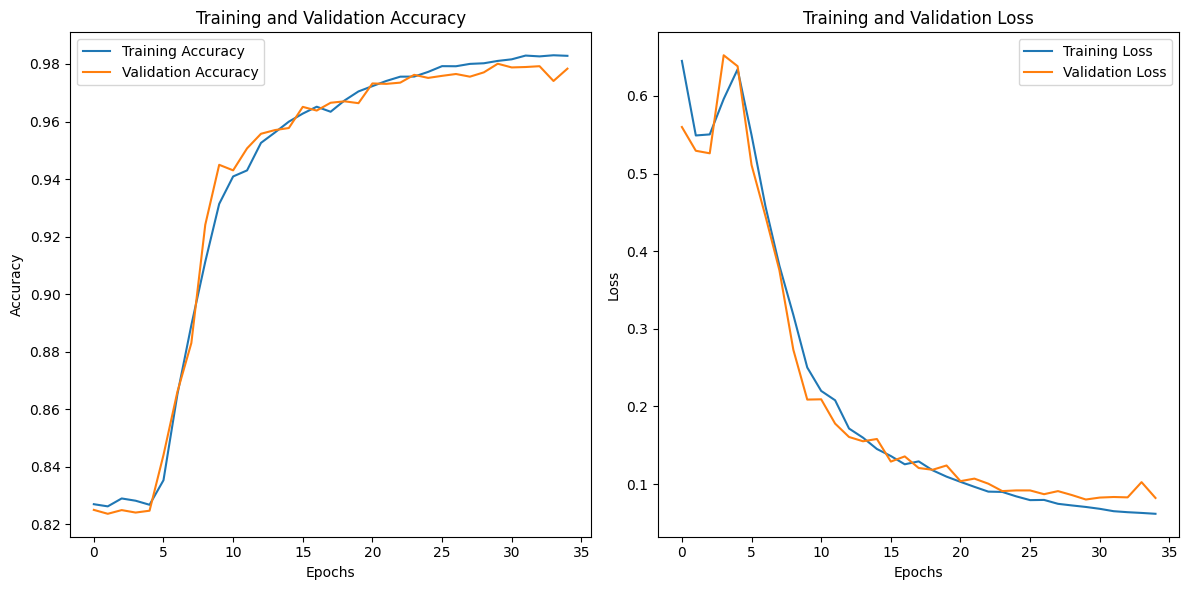

In [93]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

548/548 [==============================] - 4s 6ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


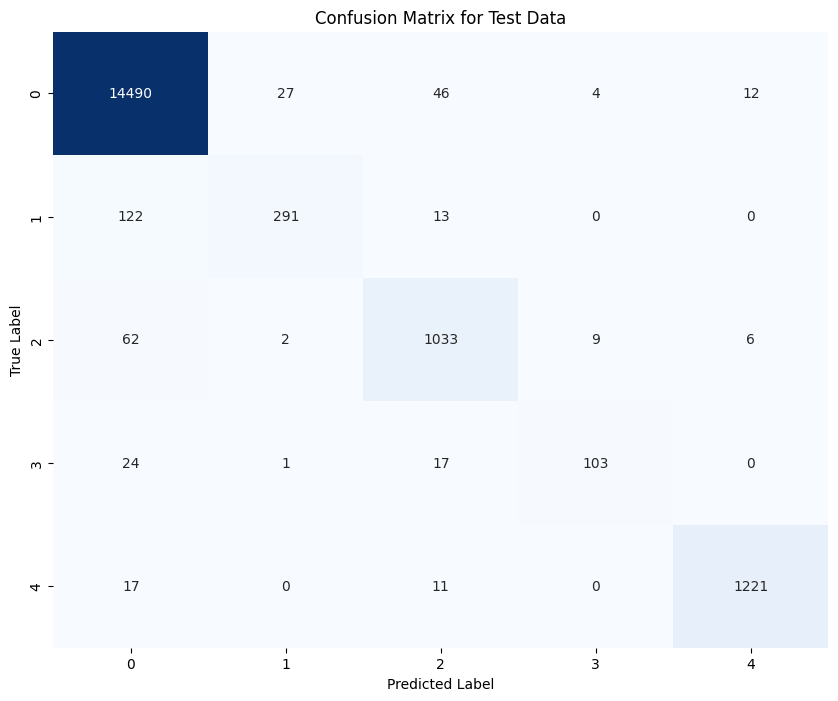

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Make predictions on the test data
y_pred_test_prob_rnn = rnn_model.predict(X_test_normalized)
y_pred_test_classes_rnn = np.argmax(y_pred_test_prob_rnn, axis=1)  # Convert probabilities to class labels

# Initialize OneHotEncoder
encoder_rnn = OneHotEncoder(sparse=False)

# Reshape y_test to a 2D array (required by OneHotEncoder)
y_test_reshaped_rnn = y_test.to_numpy().reshape(-1, 1)

# Fit and transform y_test to one-hot encoded format
y_test_onehot_rnn = encoder_rnn.fit_transform(y_test_reshaped_rnn)

# Convert one-hot encoded labels to single integer labels for y_test
y_test_classes_rnn = np.argmax(y_test_onehot_rnn, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes_rnn, y_pred_test_classes_rnn)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

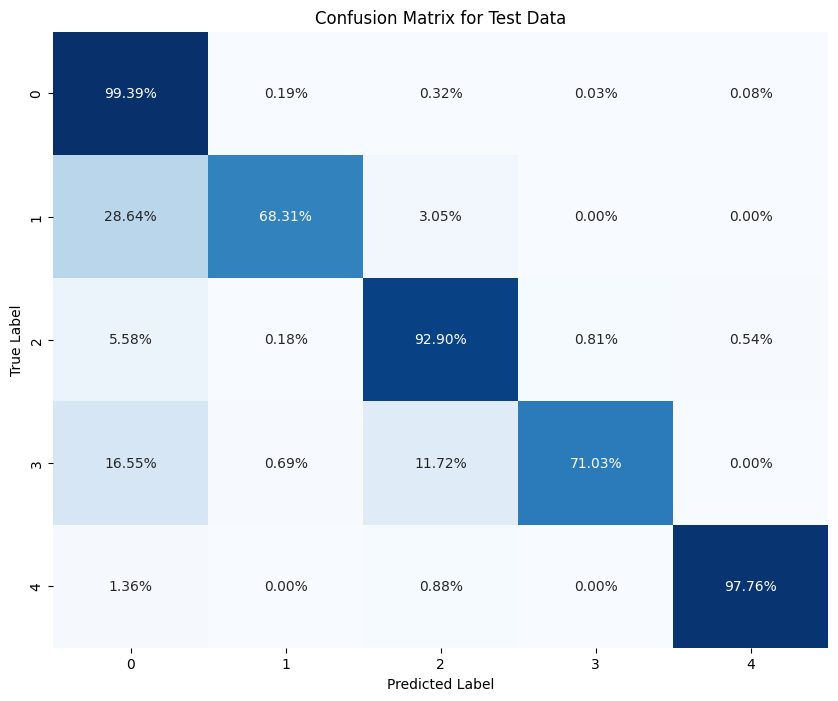

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix as before
conf_matrix = confusion_matrix(y_test_classes_rnn, y_pred_test_classes_rnn)

# Compute percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [96]:
from sklearn.metrics import accuracy_score

# Compute accuracy
test_accuracy = accuracy_score(y_test_classes_rnn, y_pred_test_classes_rnn)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.98


In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test_classes_rnn, y_pred_test_classes_rnn):
    accuracy = accuracy_score(y_test_classes_rnn, y_pred_test_classes_rnn)
    precision = precision_score(y_test_classes_rnn, y_pred_test_classes_rnn, average='micro')
    recall = recall_score(y_test_classes_rnn, y_pred_test_classes_rnn, average='micro')
    f1 = f1_score(y_test_classes_rnn, y_pred_test_classes_rnn, average='micro')
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

# Example usage:
evaluate_model(y_test_classes_rnn, y_pred_test_classes_rnn)

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-score: 0.98


# ***Building Gated Recurrent Unit (GRU) Model***

***Type of recurrent neural network (RNN) architecture that is widely used in sequence modeling tasks, such as natural language processing (NLP) and time series analysis. It is similar to the more popular Long Short-Term Memory (LSTM) networks but has fewer parameters, making it computationally less expensive to train.***

In [101]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.callbacks import EarlyStopping

# Create the GRU model
GRU_model = Sequential()

# Add the GRU layer
GRU_model.add(GRU(units=64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))

# Add a Dense layer with ReLU activation
GRU_model.add(Dense(units=128, activation='relu'))

# Add the output Dense layer with softmax activation for multiclass classification
GRU_model.add(Dense(units=5, activation='softmax'))

# Compile the model
GRU_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
GRU_model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(patience = 5, restore_best_weights=True)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_10 (GRU)                (None, 64)                12864     
                                                                 
 dense_27 (Dense)            (None, 128)               8320      
                                                                 
 dense_28 (Dense)            (None, 5)                 645       
                                                                 
Total params: 21829 (85.27 KB)
Trainable params: 21829 (85.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


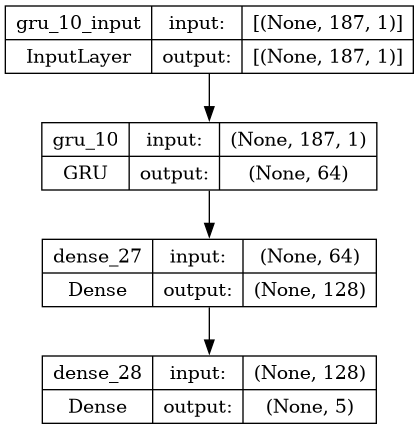

In [102]:
from tensorflow.keras.utils import plot_model

# Plot model with colored border
plot_model(GRU_model, to_file='GRU_model_plot.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)

In [103]:
# Train the model
history_GRU = GRU_model.fit(X_train_reshaped, y_train,
                            epochs=50,  # number of epochs
                            batch_size=64,  # batch size
                            validation_data=(X_valid_reshaped, y_valid),
                            callbacks=[early_stopping],
                            verbose=1)

# Evaluate the model
loss, accuracy = GRU_model.evaluate(X_valid_reshaped, y_valid)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

Epoch 1/50
876/876 [==============================] - 10s 9ms/step - loss: 0.6690 - accuracy: 0.8272 - val_loss: 0.6513 - val_accuracy: 0.8241
Epoch 2/50
876/876 [==============================] - 7s 8ms/step - loss: 0.6374 - accuracy: 0.8276 - val_loss: 0.6410 - val_accuracy: 0.8252
Epoch 3/50
876/876 [==============================] - 7s 8ms/step - loss: 0.6320 - accuracy: 0.8277 - val_loss: 0.6329 - val_accuracy: 0.8270
Epoch 4/50
876/876 [==============================] - 7s 8ms/step - loss: 0.4154 - accuracy: 0.8817 - val_loss: 0.3218 - val_accuracy: 0.9116
Epoch 5/50
876/876 [==============================] - 7s 8ms/step - loss: 0.2913 - accuracy: 0.9209 - val_loss: 0.2642 - val_accuracy: 0.9275
Epoch 6/50
876/876 [==============================] - 7s 8ms/step - loss: 0.2511 - accuracy: 0.9313 - val_loss: 0.2341 - val_accuracy: 0.9338
Epoch 7/50
876/876 [==============================] - 7s 8ms/step - loss: 0.2192 - accuracy: 0.9377 - val_loss: 0.2120 - val_accuracy: 0.9389
Epoch

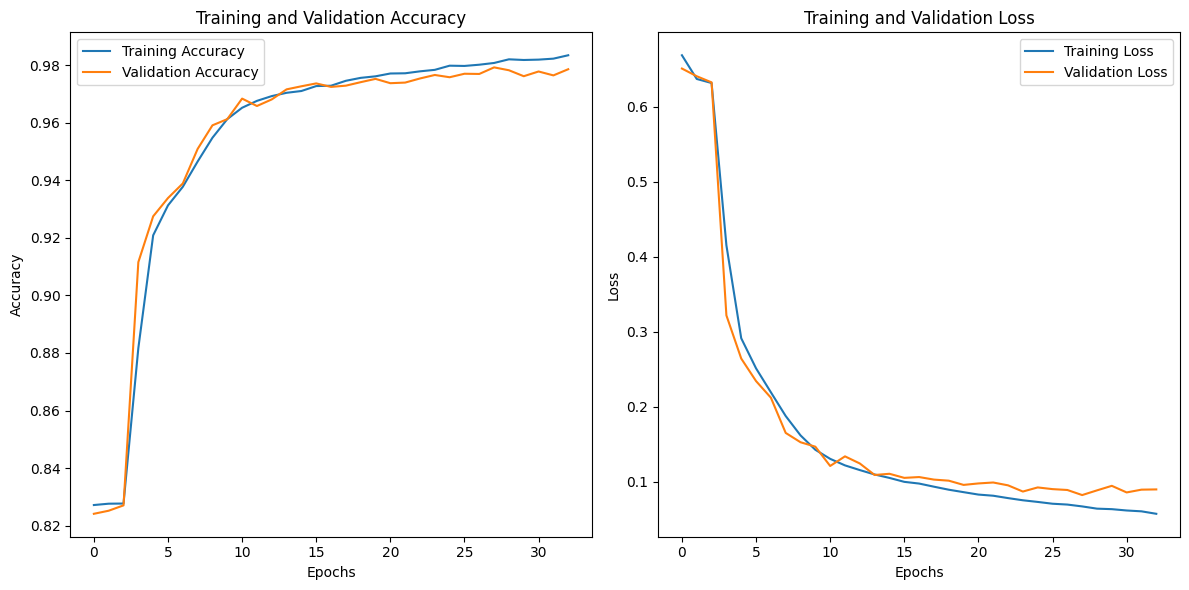

In [104]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_GRU.history['accuracy'], label='Training Accuracy')
plt.plot(history_GRU.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_GRU.history['loss'], label='Training Loss')
plt.plot(history_GRU.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

548/548 [==============================] - 2s 3ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


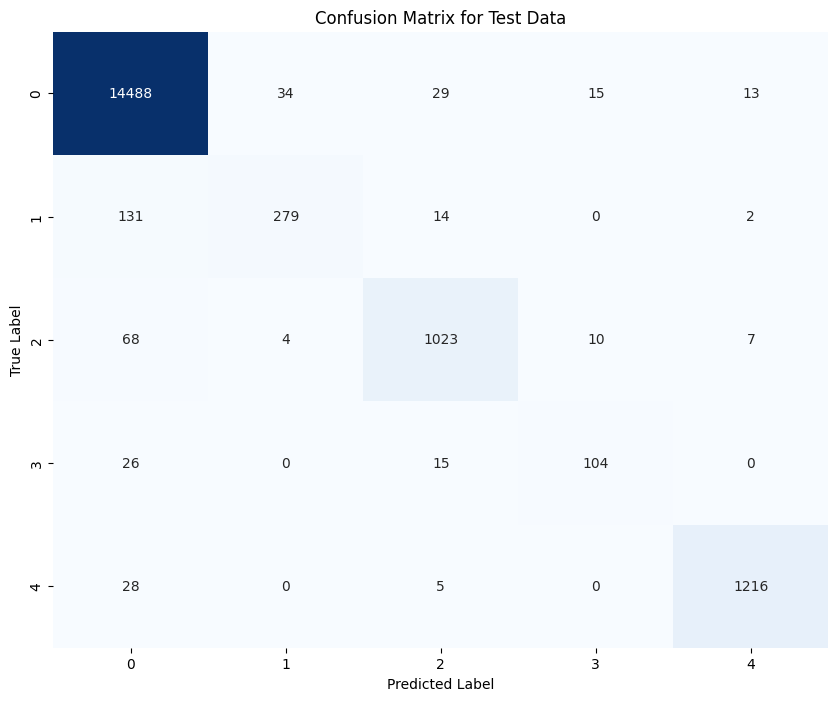

In [105]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Make predictions on the test data
y_pred_test_prob_GRU = GRU_model.predict(X_test_normalized)
y_pred_test_classes_GRU = np.argmax(y_pred_test_prob_GRU, axis=1)  # Convert probabilities to class labels

# Initialize OneHotEncoder
encoder_GRU = OneHotEncoder(sparse=False)

# Reshape y_test to a 2D array (required by OneHotEncoder)
y_test_reshaped_GRU = y_test.to_numpy().reshape(-1, 1)

# Fit and transform y_test to one-hot encoded format
y_test_onehot_GRU = encoder_GRU.fit_transform(y_test_reshaped_GRU)

# Convert one-hot encoded labels to single integer labels for y_test
y_test_classes_GRU = np.argmax(y_test_onehot_GRU, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes_GRU, y_pred_test_classes_GRU)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

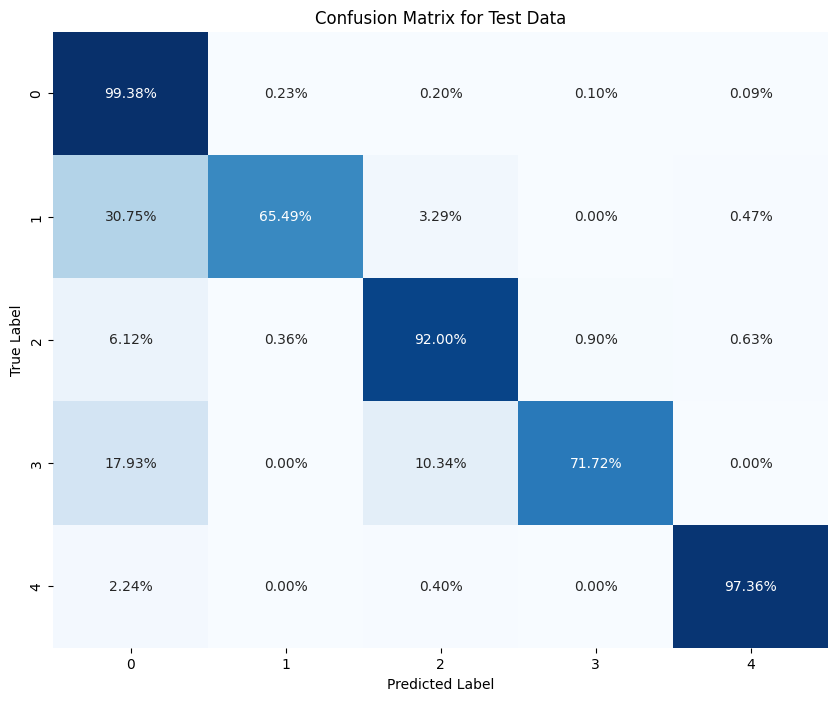

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix as before
conf_matrix = confusion_matrix(y_test_classes_GRU, y_pred_test_classes_GRU)

# Compute percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [107]:
from sklearn.metrics import accuracy_score

# Compute accuracy
test_accuracy = accuracy_score(y_test_classes_GRU, y_pred_test_classes_GRU)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.98


In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test_classes_GRU, y_pred_test_classes_GRU):
    accuracy = accuracy_score(y_test_classes_GRU, y_pred_test_classes_GRU)
    precision = precision_score(y_test_classes_GRU, y_pred_test_classes_GRU, average='micro')
    recall = recall_score(y_test_classes_GRU, y_pred_test_classes_GRU, average='micro')
    f1 = f1_score(y_test_classes_GRU, y_pred_test_classes_GRU, average='micro')
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

# Example usage:
evaluate_model(y_test_classes_GRU, y_pred_test_classes_GRU)

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-score: 0.98


# Saving all models

In [109]:
from keras.models import load_model

# Assuming 'model' is your trained Keras model

FNN_model.save("FNN_model.h5")
CNN_model.save("CNN_model.h5")
rnn_model.save("RNN_model.h5")
GRU_model.save("GRU_model.h5")

# Load the saved model
#loaded_model = load_model("your_model.h5")



/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
